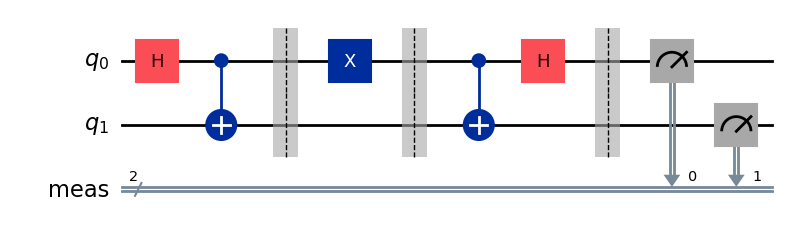

Measured 10 with frequency 1.0


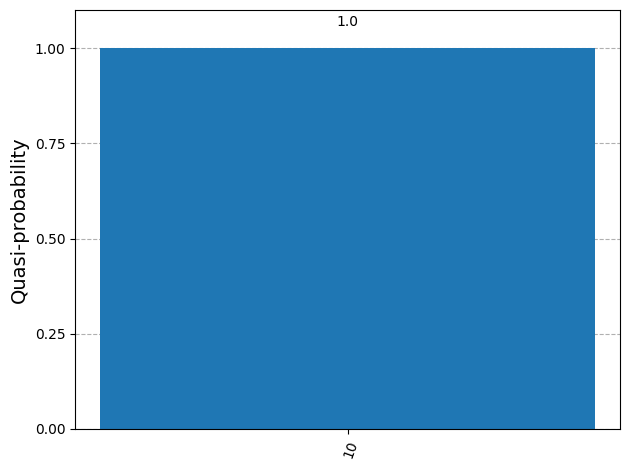

In [1]:
# Required imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Choose bits for Alice to send
c = "1"
d = "0"

protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations
if d == "1":
    protocol.z(0)
if c == "1":
    protocol.x(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

# Draw the circuit
display(protocol.draw(output='mpl'))

# Execute
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))


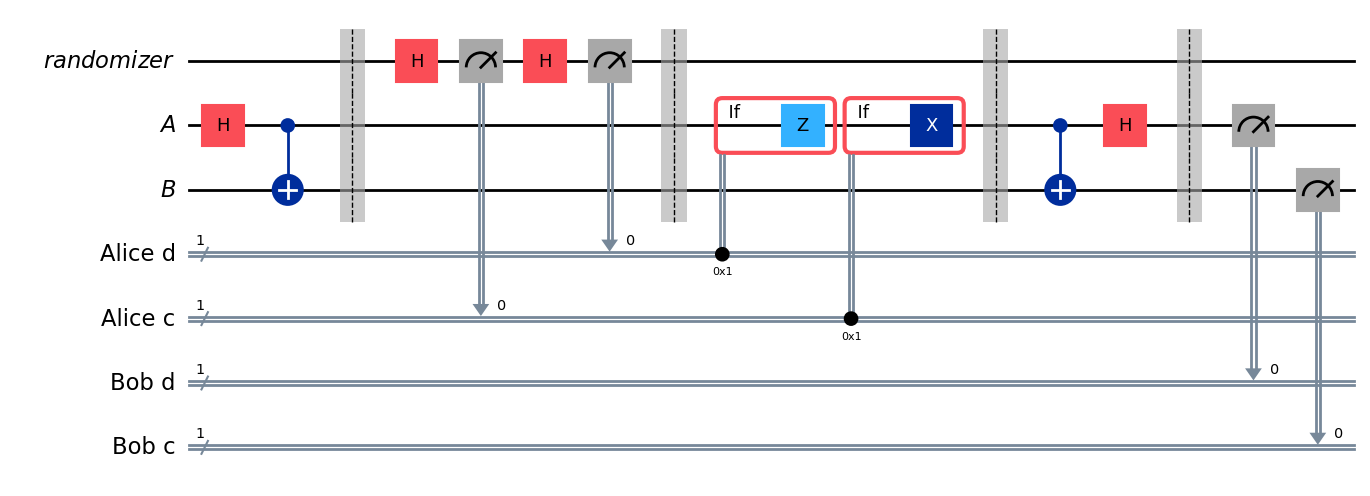

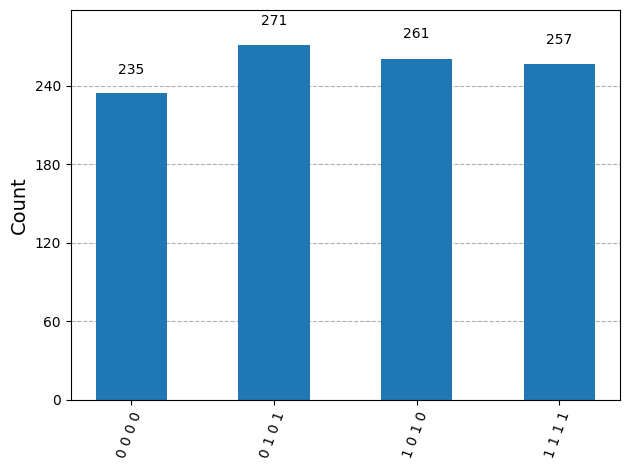

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Quantum registers
rbg = QuantumRegister(1, "randomizer")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

# Classical registers for Alice
Alice_c = ClassicalRegister(1, "Alice c")
Alice_d = ClassicalRegister(1, "Alice d")

# Build the full circuit
test = QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)

# Initialize the ebit (Bell pair)
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

# Generate Alice's random bits c and d
test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

# Alice encodes her bits (conditioned operations)
with test.if_test((Alice_d, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_c, 1), label="X"):
    test.x(ebit0)
test.barrier()

# Bob's decoding actions
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

# Classical registers for Bob
Bob_c = ClassicalRegister(1, "Bob c")
Bob_d = ClassicalRegister(1, "Bob d")
test.add_register(Bob_d)
test.add_register(Bob_c)

# Bob measures both qubits
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)

# Draw the circuit
display(test.draw(output='mpl'))

# Execute the circuit
result = AerSimulator().run(test).result()
statistics = result.get_counts()

display(plot_histogram(statistics))
